# Considerações:

## O propósito desse estudo é entender como funciona o processo de ETL através de uma API e realizar a análises adequadas.


#### Insights identificados:


* Janeiro foi o maior mês de faturamento no valor de 3018,50 correspondendo a
64,3% do total
* A categoria men's Clothing liderou Janeiro e Março no faturamento seguindo por Jewlery em Janeiro e Eletronics em Março
* Temos um Ticket médio de 938.25 e foi identificado que o cliente johnd foi o cliente que mais gastou com o valor de 562.79 de ticket médio
* A categoria de produtos que obteve maior faturamento foi a Men's clothing correspondendo a 56.4% de todo o faturamento
* O produto mais vendido foi o Fjallraven - Foldsack No. 1 Backpack na quantidade de 20 pcs e com o faturamento total de 2199.00 correspondendo 46% do total das vendas


In [ ]:

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests as rq

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [ ]:
# Pegando toda a base de dados da FakeStoreApi

response_products = rq.get("https://fakestoreapi.com/products")
response_users = rq.get("https://fakestoreapi.com/users")
response_carts = rq.get("https://fakestoreapi.com/carts")


#Criando os DataFrames correspondentes de cada base

In [ ]:
df_products = pd.json_normalize(response_products.json())
df_products.head()

,id,title,price,description,category,image,rating.rate,rating.count
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,2.1,430
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,4.6,400


In [ ]:
df_users = pd.json_normalize(response_users.json())
df_users.head()

,id,email,username,password,phone,__v,address.geolocation.lat,address.geolocation.long,address.city,address.street,address.number,address.zipcode,name.firstname,name.lastname
0,1,john@gmail.com,johnd,m38rmF$,1-570-236-7033,0,-37.3159,81.1496,kilcoole,new road,7682,12926-3874,john,doe
1,2,morrison@gmail.com,mor_2314,83r5^_,1-570-236-7033,0,-37.3159,81.1496,kilcoole,Lovers Ln,7267,12926-3874,david,morrison
2,3,kevin@gmail.com,kevinryan,kev02937@,1-567-094-1345,0,40.3467,-30.1310,Cullman,Frances Ct,86,29567-1452,kevin,ryan
3,4,don@gmail.com,donero,ewedon,1-765-789-6734,0,50.3467,-20.1310,San Antonio,Hunters Creek Dr,6454,98234-1734,don,romer
4,5,derek@gmail.com,derek,jklg*_56,1-956-001-1945,0,40.3467,-40.1310,san Antonio,adams St,245,80796-1234,derek,powell


In [ ]:
df_carts = pd.json_normalize(
    response_carts.json(),
    record_path='products',
    meta=['id', 'userId', 'date']
)

df_carts['date'] = pd.to_datetime(df_carts['date']).dt.tz_localize(None)
df_carts.head()

,productId,quantity,id,userId,date
0,1,4,1,1,2020-03-02
1,2,1,1,1,2020-03-02
2,3,6,1,1,2020-03-02
3,2,4,2,1,2020-01-02
4,1,10,2,1,2020-01-02


In [ ]:
df_products = df_products.rename(columns={'rating.rate': 'rating_rate','rating.count':'rating_count'})
df_products.head()

,id,title,price,description,category,image,rating_rate,rating_count
0,1,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",109.95,Your perfect pack for everyday use and walks i...,men's clothing,https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...,3.9,120
1,2,Mens Casual Premium Slim Fit T-Shirts,22.30,"Slim-fitting style, contrast raglan long sleev...",men's clothing,https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...,4.1,259
2,3,Mens Cotton Jacket,55.99,great outerwear jackets for Spring/Autumn/Wint...,men's clothing,https://fakestoreapi.com/img/71li-ujtlUL._AC_U...,4.7,500
3,4,Mens Casual Slim Fit,15.99,The color could be slightly different between ...,men's clothing,https://fakestoreapi.com/img/71YXzeOuslL._AC_U...,2.1,430
4,5,John Hardy Women's Legends Naga Gold & Silver ...,695.00,"From our Legends Collection, the Naga was insp...",jewelery,https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...,4.6,400


# Unindo as tabelas

In [ ]:
df_carts_products = df_carts.merge(
    df_products[['title','id', 'category','price']],
    left_on='productId',
    right_on='id',
    how='left'
)

df_carts_products = df_carts_products.rename(columns={
    'id_x': 'cart_id',
    'id_y': 'product_id'
})

df_carts_products.drop('product_id', axis=1, inplace=True)

df_carts_products.head()


,productId,quantity,cart_id,userId,date,title,category,price
0,1,4,1,1,2020-03-02,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95
1,2,1,1,1,2020-03-02,Mens Casual Premium Slim Fit T-Shirts,men's clothing,22.30
2,3,6,1,1,2020-03-02,Mens Cotton Jacket,men's clothing,55.99
3,2,4,2,1,2020-01-02,Mens Casual Premium Slim Fit T-Shirts,men's clothing,22.30
4,1,10,2,1,2020-01-02,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95


In [ ]:
# Criando a coluna total_item para saber o quanto foi gasto

df_carts_products['total_item'] = df_carts_products['quantity'] * df_carts_products['price']
df_carts_products.head()

,productId,quantity,cart_id,userId,date,title,category,price,total_item
0,1,4,1,1,2020-03-02,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95,439.80
1,2,1,1,1,2020-03-02,Mens Casual Premium Slim Fit T-Shirts,men's clothing,22.30,22.30
2,3,6,1,1,2020-03-02,Mens Cotton Jacket,men's clothing,55.99,335.94
3,2,4,2,1,2020-01-02,Mens Casual Premium Slim Fit T-Shirts,men's clothing,22.30,89.20
4,1,10,2,1,2020-01-02,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95,1099.50


In [ ]:
df_final = df_carts_products.merge(
    df_users[['id', 'username']],
    left_on='userId',
    right_on='id',
    how='left'
)

df_final

,productId,quantity,cart_id,userId,date,title,category,price,total_item,id,username
0,1,4,1,1,2020-03-02,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95,439.80,1,johnd
1,2,1,1,1,2020-03-02,Mens Casual Premium Slim Fit T-Shirts,men's clothing,22.30,22.30,1,johnd
2,3,6,1,1,2020-03-02,Mens Cotton Jacket,men's clothing,55.99,335.94,1,johnd
3,2,4,2,1,2020-01-02,Mens Casual Premium Slim Fit T-Shirts,men's clothing,22.30,89.20,1,johnd
4,1,10,2,1,2020-01-02,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95,1099.50,1,johnd
5,5,2,2,1,2020-01-02,John Hardy Women's Legends Naga Gold & Silver ...,jewelery,695.00,1390.00,1,johnd
6,1,2,3,2,2020-03-01,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95,219.90,2,mor_2314
7,9,1,3,2,2020-03-01,WD 2TB Elements Portable External Hard Drive -...,electronics,64.00,64.00,2,mor_2314
8,1,4,4,3,2020-01-01,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",men's clothing,109.95,439.80,3,kevinryan
9,7,1,5,3,2020-03-01,White Gold Plated Princess,jewelery,9.99,9.99,3,kevinryan


# Análise do Dataframe final

## Análise dos Clientes

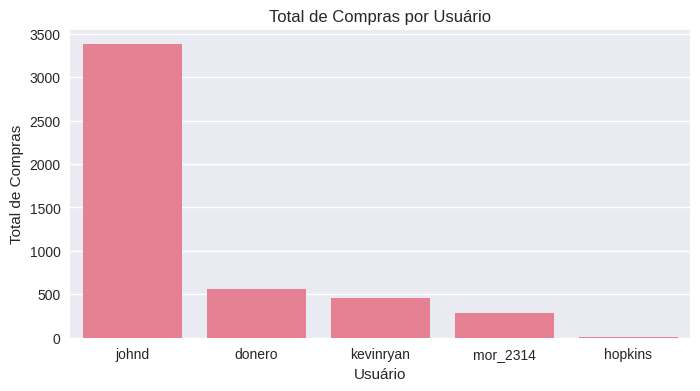

In [ ]:
total_vendas_por_usuario = df_final.groupby('username')['total_item'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=total_vendas_por_usuario.index, y=total_vendas_por_usuario.values)
plt.xlabel('Usuário')
plt.ylabel('Total de Compras')
plt.title('Total de Compras por Usuário')
plt.show()

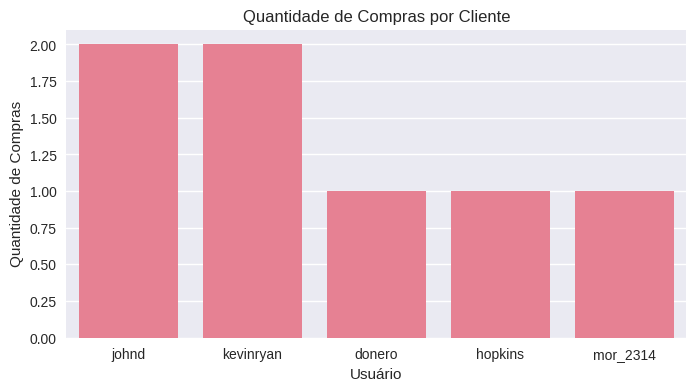

In [ ]:
# Quantidade de compras por cliente

compras_por_cliente = df_final.groupby('username')['cart_id'].nunique().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=compras_por_cliente.index, y=compras_por_cliente.values)
plt.xlabel('Usuário')
plt.ylabel('Quantidade de Compras')
plt.title('Quantidade de Compras por Cliente')
plt.show()

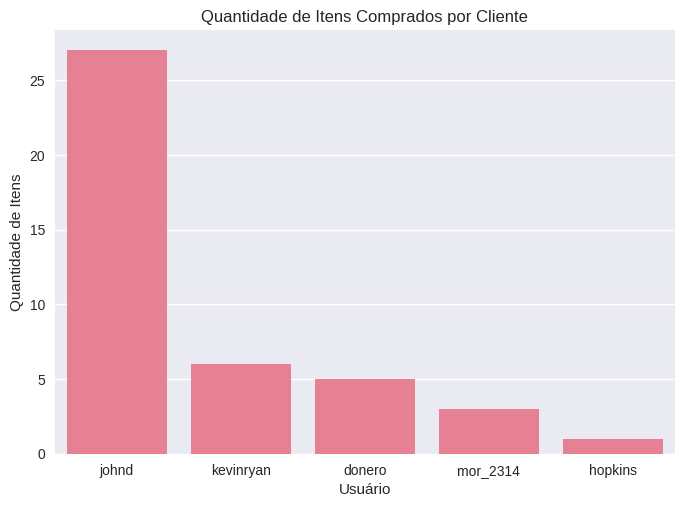

In [ ]:
# Quantidade de Itens Comprados por Cliente

qtidade_items_por_cliente = df_final.groupby('username')['quantity'].sum().sort_values(ascending=False)

sns.barplot(x=qtidade_items_por_cliente.index, y=qtidade_items_por_cliente.values)
plt.xlabel('Usuário')
plt.ylabel('Quantidade de Itens')
plt.title('Quantidade de Itens Comprados por Cliente')
plt.show()


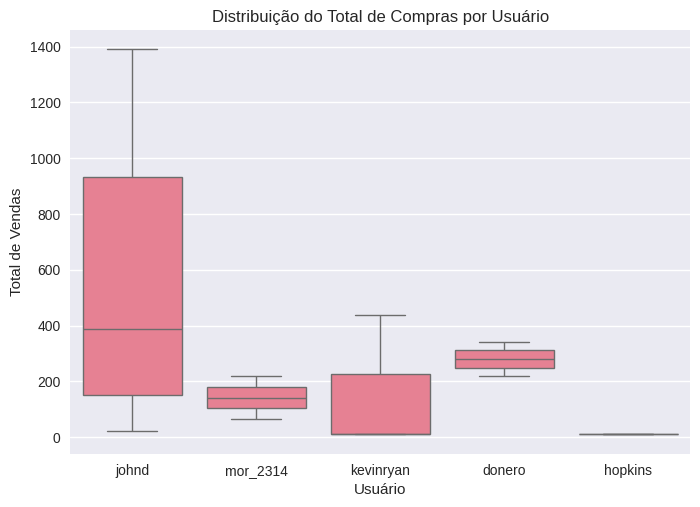

In [ ]:

sns.boxplot(x='username', y='total_item', data=df_final)
plt.xlabel('Usuário')
plt.ylabel('Total de Vendas')
plt.title('Distribuição do Total de Compras por Usuário')
plt.show()

## Análise do Faturamento

In [ ]:
# Faturamento total da Base

total_vendas = df_final['total_item'].sum()
print(f'O faturamento total é de {total_vendas}')

O faturamento total é de 4691.27


In [ ]:
 # Ticket Médio total e por usuário

ticket_medio_total = df_final.groupby('username')['total_item'].sum().mean().round(2)
ticket_medio_usuario = df_final.groupby('username')['total_item'].mean().sort_values(ascending=False).round(2)
ticket_medio_usuario.index.name = None

print(f'Ticket Médio Total: {ticket_medio_total}')
print(f'Ticket Médio por Usuário:\n{ticket_medio_usuario}')

Ticket Médio Total: 938.25
Ticket Médio por Usuário:
johnd        562.79
donero       280.00
kevinryan    153.59
mor_2314     141.95
hopkins        9.85
Name: total_item, dtype: float64


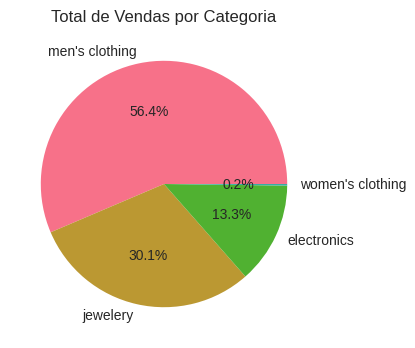

In [ ]:
# Faturamento das Categorias

total_vendas_por_categoria = df_final.groupby('category')['total_item'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
plt.pie(total_vendas_por_categoria, labels=total_vendas_por_categoria.index, autopct='%1.1f%%')
plt.title('Total de Vendas por Categoria')
plt.show()

In [ ]:
# Analisando as vendas por mês

df_final['month'] = df_final['date'].dt.month

dic_month = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}

df_final['month'] = df_final['month'].map(dic_month)
total_vendas_por_mes = df_final.groupby('month')['total_item'].sum().reset_index()
total_vendas_por_mes['Percentage'] = (total_vendas_por_mes['total_item'] / total_vendas_por_mes['total_item'].sum()).round(3) * 100
total_vendas_por_mes

,month,total_item,Percentage
0,Janeiro,3018.50,64.3
1,Março,1672.77,35.7


In [ ]:
# Faturamento total por produto e quantidade

Produtos_mais_vendidos = df_final.groupby('title').agg(
    total_item=('total_item', 'sum'),
    Quantity=('quantity', 'sum')
).sort_values(by='total_item', ascending=False).reset_index()

Produtos_mais_vendidos['Percentage'] = (Produtos_mais_vendidos['total_item'] / Produtos_mais_vendidos['total_item'].sum()).round(3) * 100
Produtos_mais_vendidos

,title,total_item,Quantity,Percentage
0,"Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...",2199.00,20,46.9
1,John Hardy Women's Legends Naga Gold & Silver ...,1390.00,2,29.6
2,WD 4TB Gaming Drive Works with Playstation 4 P...,342.00,3,7.3
3,Mens Cotton Jacket,335.94,6,7.2
4,SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...,218.00,2,4.6
5,Mens Casual Premium Slim Fit T-Shirts,111.50,5,2.4
6,WD 2TB Elements Portable External Hard Drive -...,64.00,1,1.4
7,Pierced Owl Rose Gold Plated Stainless Steel D...,10.99,1,0.2
8,White Gold Plated Princess,9.99,1,0.2
9,MBJ Women's Solid Short Sleeve Boat Neck V,9.85,1,0.2


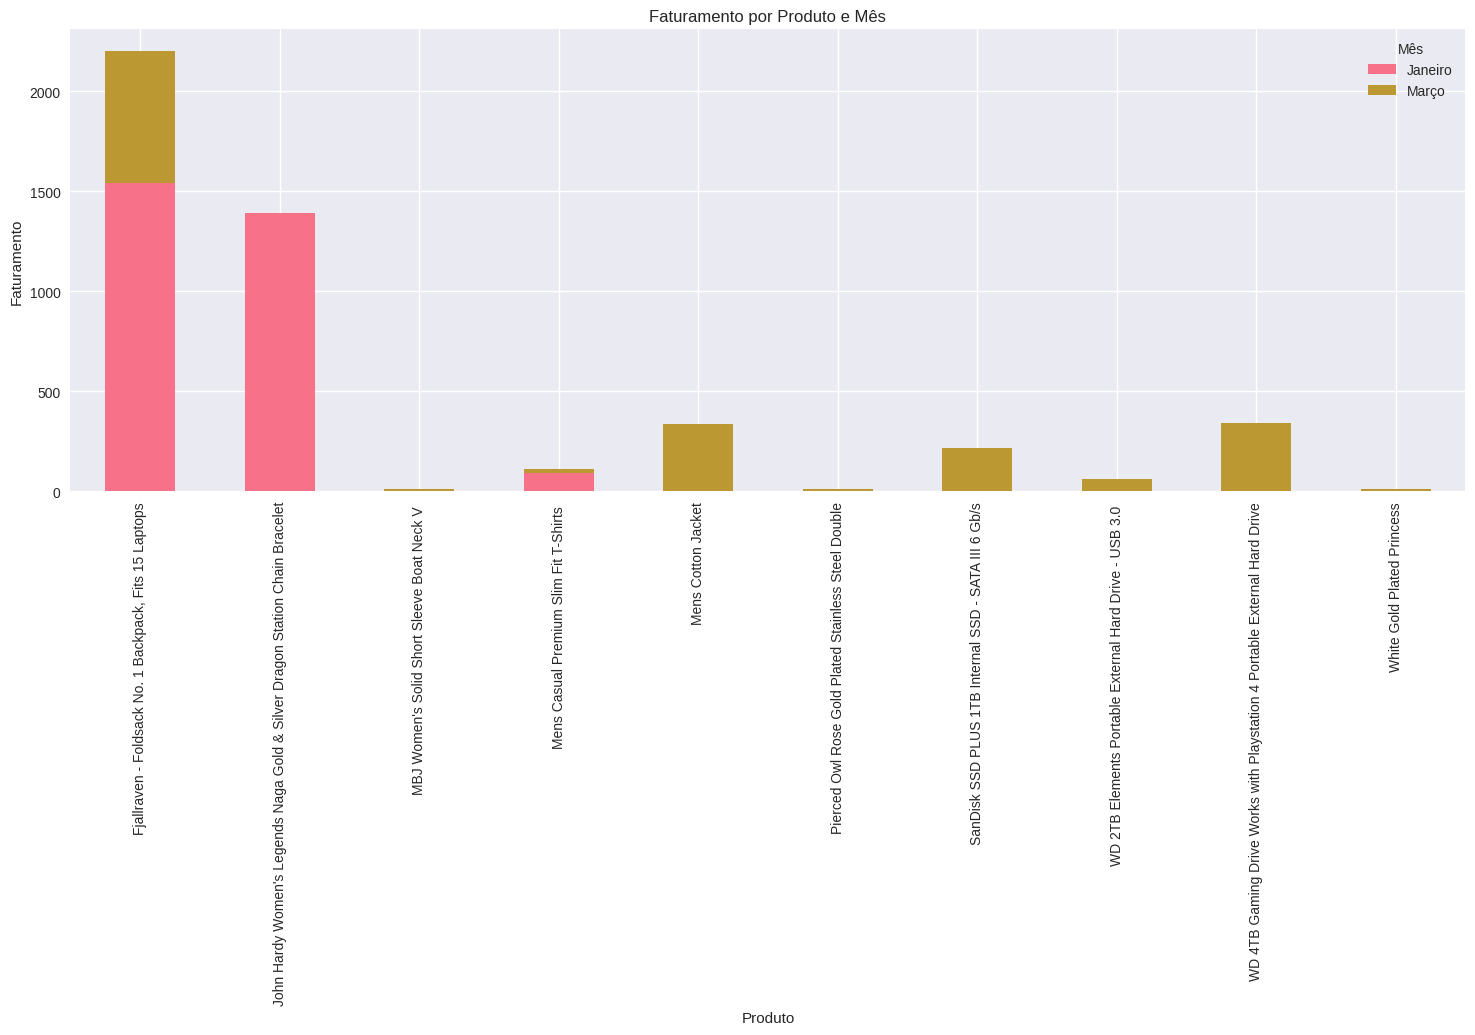

In [ ]:
faturamento_por_mes = df_final.groupby(['month','title'])['total_item'].sum().reset_index()

pivot = faturamento_por_mes.pivot(
    index='title',
    columns='month',
    values='total_item'
).fillna(0)

pivot.plot(
    kind='bar',
    stacked=True,
    figsize=(18, 6)
)
plt.xlabel('Produto')
plt.ylabel('Faturamento')
plt.title('Faturamento por Produto e Mês')
plt.legend(title='Mês')
plt.show()


In [ ]:
usuario_categoria = (
    df_final
    .groupby(['username', 'category'])['total_item']
    .sum()
    .reset_index()
    .sort_values(['username', 'total_item'], ascending=[True, False])
)
usuario_categoria

,username,category,total_item
0,donero,electronics,560.00
1,hopkins,women's clothing,9.85
3,johnd,men's clothing,1986.74
2,johnd,jewelery,1390.00
5,kevinryan,men's clothing,439.80
4,kevinryan,jewelery,20.98
7,mor_2314,men's clothing,219.90
6,mor_2314,electronics,64.00


In [ ]:
categoria_favorita_usuarios = usuario_categoria.loc[usuario_categoria.groupby('username')['total_item'].idxmax()].sort_values('total_item', ascending=False)
categoria_favorita_usuarios

,username,category,total_item
3,johnd,men's clothing,1986.74
0,donero,electronics,560.00
5,kevinryan,men's clothing,439.80
7,mor_2314,men's clothing,219.90
1,hopkins,women's clothing,9.85


In [ ]:
categoria_mes = (
    df_final
    .groupby(['month', 'category'])['total_item']
    .sum()
    .reset_index()
    .sort_values(['month', 'total_item'], ascending=[True, False])
)
categoria_mes

,month,category,total_item
1,Janeiro,men's clothing,1628.50
0,Janeiro,jewelery,1390.00
4,Março,men's clothing,1017.94
2,Março,electronics,624.00
3,Março,jewelery,20.98
5,Março,women's clothing,9.85
